In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import(accuracy_score,precision_score,roc_curve,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,auc)
from sklearn.naive_bayes import GaussianNB

In [6]:
df=pd.read_csv(r"C:\Users\bhanu\Downloads\student-mat.csv",sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
new_df=df.drop(['age','Medu', 'Fedu','traveltime', 'studytime',
       'failures','famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],axis=1)

In [8]:
new_df=pd.get_dummies(new_df,columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'],drop_first=True)

In [9]:
new_df

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,True,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,False,False,True,True,True,False,False,False,False,False,...,True,False,True,False,True,False,True,True,True,False
3,False,False,True,False,True,True,False,False,False,False,...,True,False,False,True,True,True,True,True,True,True
4,False,False,True,False,True,False,True,False,False,False,...,False,False,False,True,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,True,True,True,True,False,False,False,True,False,False,...,False,True,False,True,True,False,True,True,False,False
391,True,True,True,True,True,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False
392,True,True,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
393,True,True,False,True,True,False,False,True,False,False,...,True,False,False,False,False,False,False,True,True,False


In [13]:
x=new_df.drop('address_U',axis=1)
y=new_df['address_U']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [19]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7468354430379747
0.8703703703703703
0.8245614035087719
0.7074561403508772
              precision    recall  f1-score   support

       False       0.48      0.63      0.55        19
        True       0.87      0.78      0.82        60

    accuracy                           0.75        79
   macro avg       0.68      0.71      0.69        79
weighted avg       0.78      0.75      0.76        79



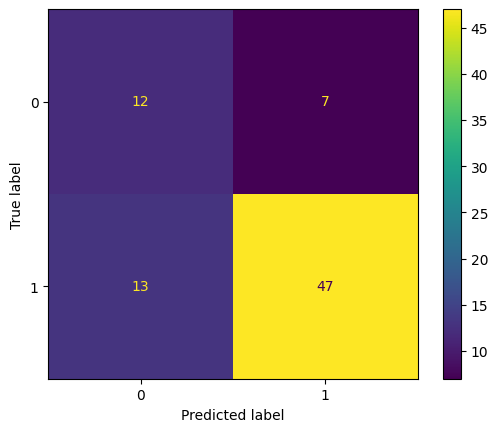

In [23]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()

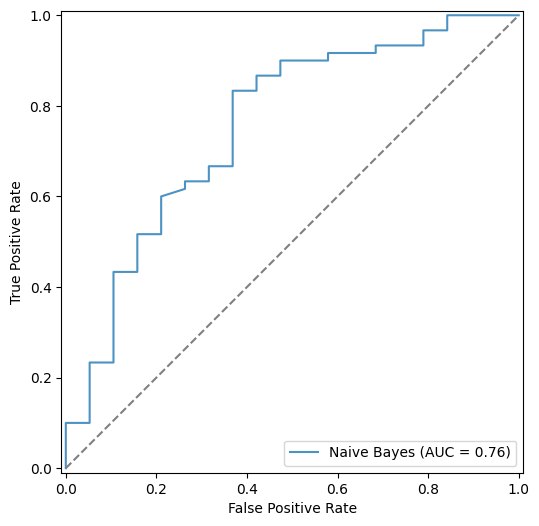

AUC: 0.756


In [38]:
y_score = model.predict_proba(x_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes')
display.plot(ax=plt.gca(), alpha=0.8)

# Add diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random (AUC = 0.5)')
plt.show()

# Optional: Print AUC
print(f"AUC: {roc_auc:.3f}")

<Figure size 1000x800 with 0 Axes>

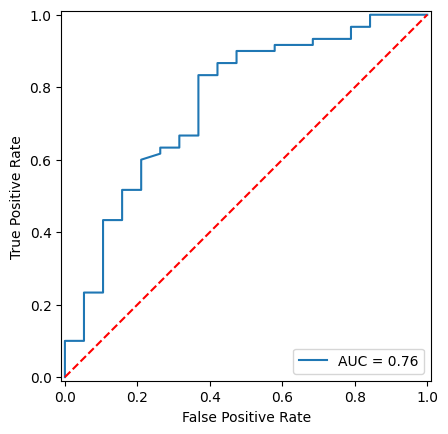

In [39]:
y_score=model.predict_proba(x_test)[:,1]
fpr,tpr,_=roc_curve(y_test,y_score)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(10,8))
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.show()